## BRRFS

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
csv_Data = pd.read_csv('2015.csv')
csv_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


In [3]:
Data = pd.DataFrame(csv_Data[['SCNTMEL1', 'SCNTMNY1', 'MENTHLTH', 'MISTMNT', 'ADMOVE', 'ADTHINK', 'ADFAIL', 'ADEAT1', 
                              'ADENERGY', 'ADSLEEP', 'ADDOWN', 'ADPLEASR', 'LMTJOIN3', '_BMI5CAT', '_BMI5', 'INCOME2', 
                              '_AGEG5YR', 'SEX', 'DRADVISE', 'WTCHSALT', '_TOTINDA', 'EXRACT11', 'STRENGTH', 'EXERHMM1', 
                              'EXEROFT1', '_VEGLT1', '_FRTLT1', 'VEGETAB1', 'FVORANG', 'FVGREEN', 'FVBEANS', 'FRUIT1', 
                              'FRUITJU1', '_RFDRHV5', '_DRNKWEK', '_SMOKER3', '_CHOLCHK', '_RFHYPE5', 'TOLDHI2', 
                              'BPHIGH4', 'ADDEPEV2', 'ADANXEV', '_DRDXAR1', '_MICHD', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4', 
                              'CHCKIDNY', 'PREDIAB1', 'DIABETE3', 'ASTHMA3', 'CHCCOPD1', 'EMPLOY1', 'VETERAN3', 
                              'CHILDREN', 'INTERNET','_RFCHOL']])
Data.shape

(441456, 57)

In [4]:
data = pd.DataFrame(Data[[ 'SEX','_AGEG5YR','_BMI5CAT','_FRTLT1','_VEGLT1'
                         ,'_TOTINDA','_SMOKER3','_RFDRHV5','_RFHYPE5','_RFCHOL','WTCHSALT','DRADVISE'
                         ,'CVDINFR4','CVDCRHD4','CVDSTRK3','_MICHD']])
#Rename columns 
cols = ['sex','age','BMI','eat_fruit', 'eat_veggie'
       ,'physical_activity','smoker','alcohol','bloodpressure_high','bloodcholesterol_high','watch_sodium','reduced_sodium'
       ,'heart_attack','angina_CDC','stroke','CHD_MI']
data.columns = cols
data.head()

,sex,age,BMI,eat_fruit,eat_veggie,physical_activity,smoker,alcohol,bloodpressure_high,bloodcholesterol_high,watch_sodium,reduced_sodium,heart_attack,angina_CDC,stroke,CHD_MI
0,2.0,9.0,4.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0
1,2.0,7.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,11.0,2.0,9.0,9.0,9.0,9.0,9.0,1.0,2.0,NaN,NaN,7.0,2.0,1.0,NaN
3,2.0,9.0,3.0,1.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,9.0,2.0,9.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sex                    441456 non-null  float64
 1   age                    441456 non-null  float64
 2   BMI                    405058 non-null  float64
 3   eat_fruit              441456 non-null  float64
 4   eat_veggie             441456 non-null  float64
 5   physical_activity      441456 non-null  float64
 6   smoker                 441456 non-null  float64
 7   alcohol                441456 non-null  float64
 8   bloodpressure_high     441456 non-null  float64
 9   bloodcholesterol_high  382302 non-null  float64
 10  watch_sodium           41299 non-null   float64
 11  reduced_sodium         41263 non-null   float64
 12  heart_attack           441456 non-null  float64
 13  angina_CDC             441455 non-null  float64
 14  stroke                 441456 non-nu

In [6]:
data.isna().sum()

sex                           0
age                           0
BMI                       36398
eat_fruit                     0
eat_veggie                    0
physical_activity             0
smoker                        0
alcohol                       0
bloodpressure_high            0
bloodcholesterol_high     59154
watch_sodium             400157
reduced_sodium           400193
heart_attack                  0
angina_CDC                    1
stroke                        0
CHD_MI                     3942
dtype: int64

# Data Cleaning

In [7]:
data['heart_attack'] = data['heart_attack'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data['angina_CDC'] = data['angina_CDC'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data['stroke'] = data['stroke'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data['CHD_MI'] = data['CHD_MI'].map ({1: 'Yes', 2: 'No', 9: np.nan})

In [8]:
data["heart_diseases"] = np.nan
data["heart_diseases"]  = np.where((data['heart_attack'] == 'Yes') | 
                                    (data['angina_CDC'] == 'Yes') |
                                   (data['stroke']=='Yes')|
                                   (data['CHD_MI']=='Yes'), 'Yes', 'No')
data = data.drop(columns=['heart_attack','angina_CDC','stroke','CHD_MI'])

In [9]:
#SEX
data['sex'] = data['sex'].map({1: 'Male', 2: 'Female'})
data.sex.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
#Age
data['age'] = data['age'].map({1: '18-24', 
                             2: '25-29',
                             3: '30-34',
                             4: '35-39',
                             5: '40-44',
                             6: '45-49',
                             7: '50-54',
                             8: '55-59',
                             9: '60-64',
                             10: '65-69',
                             11: '70-74',
                             12: '75-79',
                             13: '>80',
                             14 : np.nan})
data.age.unique()

array(['60-64', '50-54', '70-74', '>80', '65-69', '75-79', '55-59',
       '35-39', '45-49', '25-29', '30-34', '40-44', '18-24', nan],
      dtype=object)

In [11]:
#BMI
data['BMI'] = data['BMI'].map({1: 'Under_weight', 
                                                             2: 'Normal_weight',
                                                             3: 'Over_weight',
                                                             4: 'Obese',
                                                            })
data.BMI.unique()

array(['Obese', 'Over_weight', 'Normal_weight', 'Under_weight', nan],
      dtype=object)

In [12]:
#1 eat_fruit
# 1 Consumed fruit one or more times per day 
# 2 Consumed fruit less than one time per day
#data['eat_fruit'] = data['eat_fruit'].cat.rename_categories ({1: 'Yes', 2: 'No', 9: np.nan})
data['eat_fruit'] = data['eat_fruit'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data.eat_fruit.unique()

array(['No', nan, 'Yes'], dtype=object)

In [13]:
#2 eat_veggie
# 1 Consumed vegetables one or more times per day
# 2 Consumed vegetables less than one time per day
data['eat_veggie'] = data['eat_veggie'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data.eat_veggie.unique()

array(['Yes', 'No', nan], dtype=object)

In [14]:
#3 physical activity
# 1 Had physical activity or exercise
# 2 No physical activity or exercise in last 30 days
data['physical_activity'] = data['physical_activity'].map ({1: 'Yes', 2: 'No', 9: np.nan})
data.physical_activity.unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
#4 smoker
data['smoker'] = data['smoker'].map ({1: 'Yes', 2: 'Yes', 3: 'Yes', 4: 'No', 9: np.nan})
data.smoker.unique()

array(['Yes', nan, 'No'], dtype=object)

In [16]:
#5 alcohol
data['alcohol'] = data['alcohol'].map ({1: 'No', 2: 'Yes', 9: np.nan})
data.alcohol.unique()

array(['No', nan, 'Yes'], dtype=object)

In [17]:
#6 high blood pressure
data['bloodpressure_high'] = data['bloodpressure_high'].map ({1: 'No', 2: 'Yes', 9: np.nan})
data.bloodpressure_high.unique()

array(['Yes', 'No', nan], dtype=object)

In [18]:
#7 high blood cholesterol
data['bloodcholesterol_high'] = data['bloodcholesterol_high'].map ({1: 'No', 2: 'Yes', 9: np.nan})
data.bloodcholesterol_high.unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
#8 watch sodium
data['watch_sodium'] = data['watch_sodium'].map ({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
data.watch_sodium.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [20]:
#9 reduced sodium
data['reduced_sodium'] = data['reduced_sodium'].map ({1: 'Yes', 2: 'No',7: np.nan, 9: np.nan})
data.reduced_sodium.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [21]:
data.isna().sum()

sex                           0
age                        5336
BMI                       36398
eat_fruit                 43711
eat_veggie                51117
physical_activity         37992
smoker                    17990
alcohol                   25733
bloodpressure_high         1367
bloodcholesterol_high     62715
watch_sodium             400383
reduced_sodium           400455
heart_diseases                0
dtype: int64

In [22]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [23]:
data.isna().sum()

sex                      0
age                      0
BMI                      0
eat_fruit                0
eat_veggie               0
physical_activity        0
smoker                   0
alcohol                  0
bloodpressure_high       0
bloodcholesterol_high    0
watch_sodium             0
reduced_sodium           0
heart_diseases           0
dtype: int64

# Exploratory Data Analysis

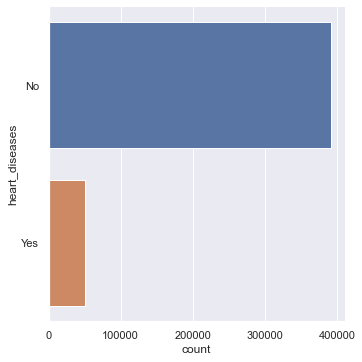

In [24]:
sb.catplot(y = 'heart_diseases', data = data, kind = "count")

In [25]:
countG, countB = data['heart_diseases'].value_counts()
print("Ratio of classes is No : Yes = ", countG, ":", countB)

Ratio of classes is No : Yes =  391226 : 50230


<AxesSubplot:xlabel='count', ylabel='BMI'>

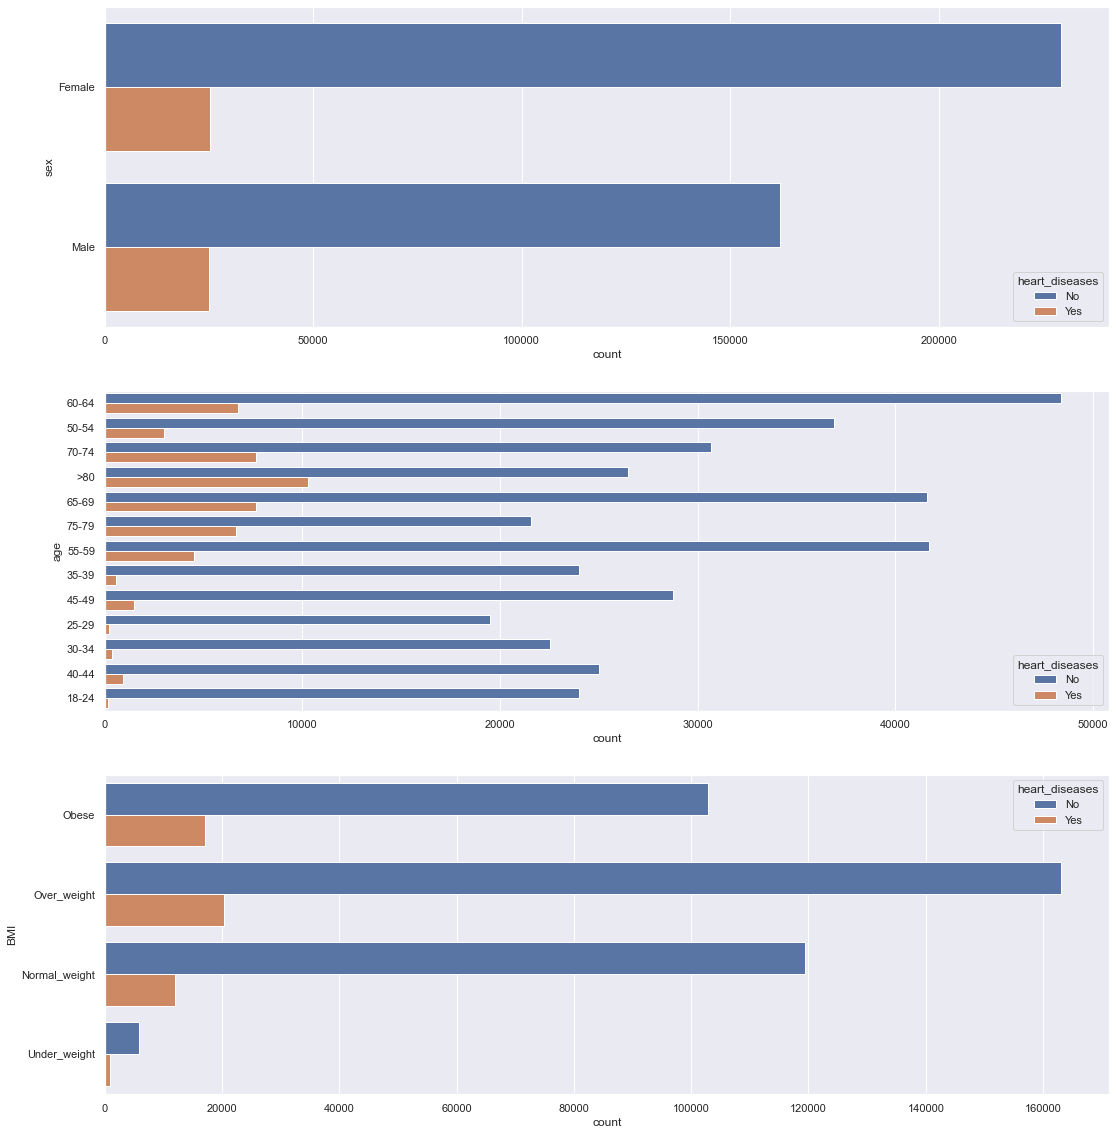

In [26]:
#Compare heart diseases cases with sex, age and BMI
f, axes = plt.subplots(3, 1, figsize=(18, 20))
sb.countplot(y='sex', hue='heart_diseases', data=data, ax=axes[0])
sb.countplot(y='age', hue='heart_diseases', data=data, ax=axes[1])
sb.countplot(y='BMI', hue='heart_diseases', data=data, ax=axes[2])

<AxesSubplot:xlabel='sex', ylabel='heart_diseases'>

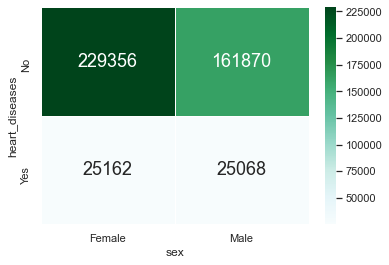

In [27]:
# Heart Diseases vs Sex
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['heart_diseases', 'sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='age', ylabel='heart_diseases'>

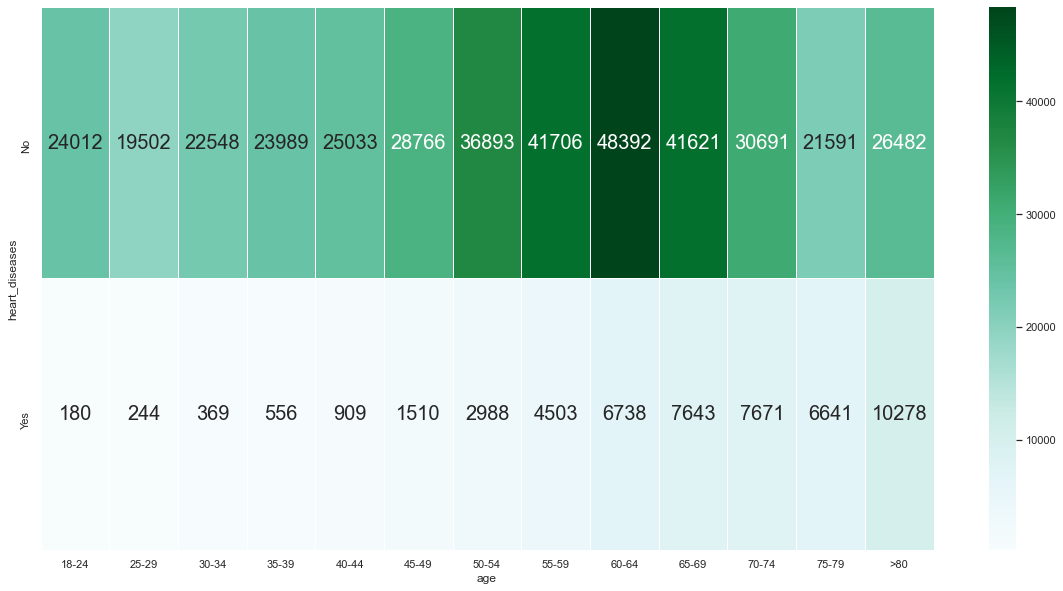

In [28]:
# Heart Diseases vs Age
f = plt.figure(figsize=(20, 10))
sb.heatmap(data.groupby(['heart_diseases', 'age']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn")

<AxesSubplot:xlabel='BMI', ylabel='heart_diseases'>

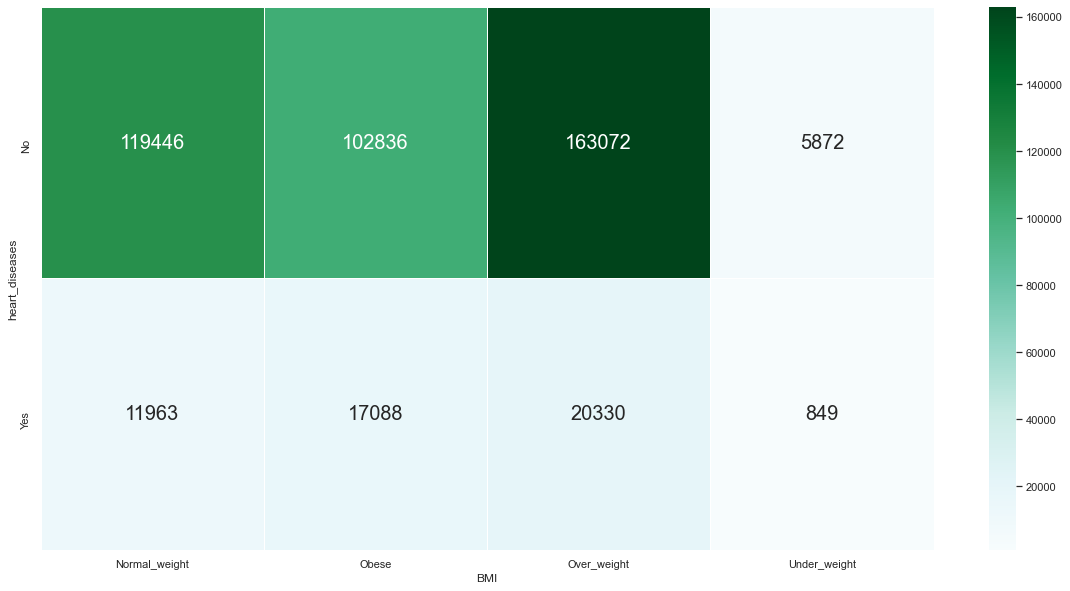

In [29]:
# Heart Diseases vs BMI
f = plt.figure(figsize=(20, 10))
sb.heatmap(data.groupby(['heart_diseases', 'BMI']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn")

<AxesSubplot:xlabel='eat_veggie', ylabel='heart_diseases'>

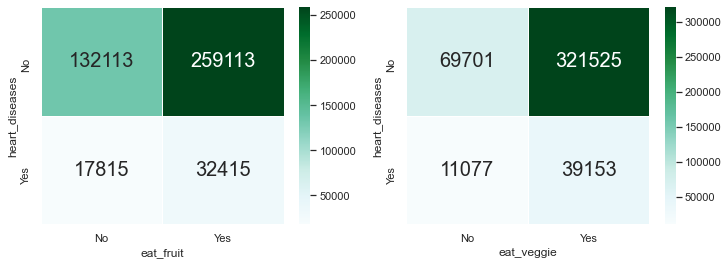

In [30]:
# Heart Diseases vs food intake
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(data.groupby(['heart_diseases', 'eat_fruit']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[0])
sb.heatmap(data.groupby(['heart_diseases', 'eat_veggie']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[1])

<AxesSubplot:xlabel='alcohol', ylabel='heart_diseases'>

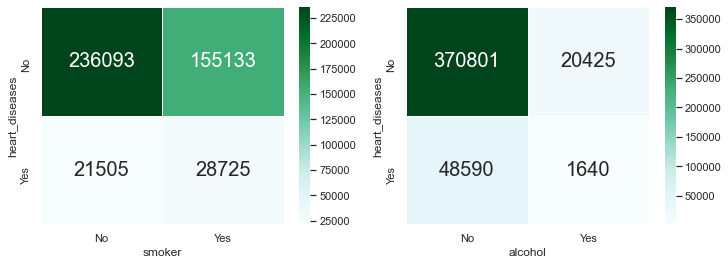

In [31]:
# Heart Diseases vs smoke and alcohol
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(data.groupby(['heart_diseases', 'smoker']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[0])
sb.heatmap(data.groupby(['heart_diseases', 'alcohol']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[1])

<AxesSubplot:xlabel='bloodcholesterol_high', ylabel='heart_diseases'>

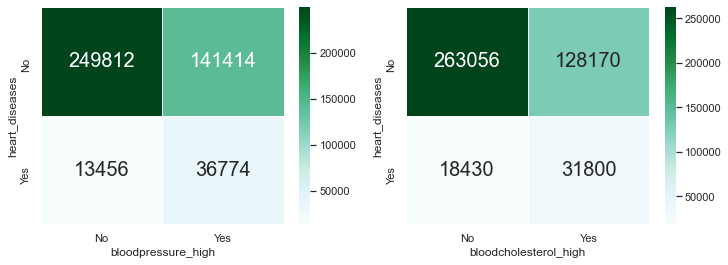

In [32]:
# Heart Diseases vs blood pressure and blood cholesterol high
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(data.groupby(['heart_diseases', 'bloodpressure_high']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[0])
sb.heatmap(data.groupby(['heart_diseases', 'bloodcholesterol_high']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[1])

<AxesSubplot:xlabel='reduced_sodium', ylabel='heart_diseases'>

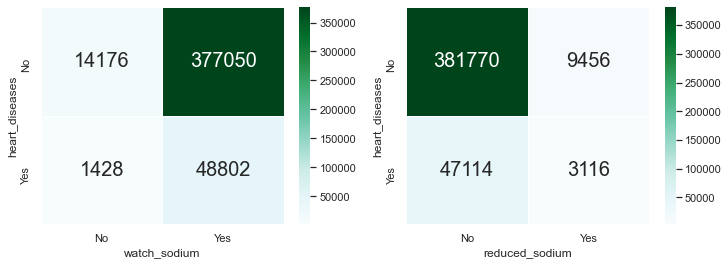

In [33]:
# Heart Diseases vs watch_sodium and reduced_sodium	
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(data.groupby(['heart_diseases', 'watch_sodium']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[0])
sb.heatmap(data.groupby(['heart_diseases', 'reduced_sodium']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn",ax = axes[1])

<AxesSubplot:xlabel='physical_activity', ylabel='heart_diseases'>

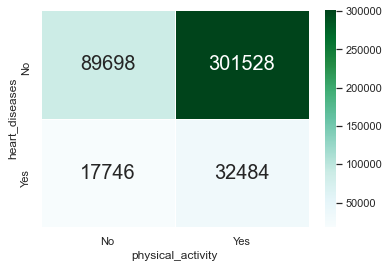

In [34]:
# Heart Diseases vs physical_activity
sb.heatmap(data.groupby(['heart_diseases', 'physical_activity']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 20}, cmap = "BuGn")

In [35]:
data_illness = data[(data.heart_diseases!= 'No')]

In [36]:
data_illness

,sex,age,BMI,eat_fruit,eat_veggie,physical_activity,smoker,alcohol,bloodpressure_high,bloodcholesterol_high,watch_sodium,reduced_sodium,heart_diseases
2,Female,70-74,Normal_weight,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes
11,Female,>80,Over_weight,No,Yes,No,No,No,Yes,Yes,No,No,Yes
12,Female,70-74,Over_weight,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes
14,Female,>80,Over_weight,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes
16,Female,60-64,Obese,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441436,Female,>80,Normal_weight,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
441442,Male,55-59,Normal_weight,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes
441446,Male,75-79,Over_weight,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
441447,Male,45-49,Obese,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes


In [37]:
cols = list(data_illness.columns)
cols.pop()

'heart_diseases'

In [38]:
data_illness = data_illness[cols]
data_illness

,sex,age,BMI,eat_fruit,eat_veggie,physical_activity,smoker,alcohol,bloodpressure_high,bloodcholesterol_high,watch_sodium,reduced_sodium
2,Female,70-74,Normal_weight,Yes,Yes,Yes,No,No,No,Yes,Yes,No
11,Female,>80,Over_weight,No,Yes,No,No,No,Yes,Yes,No,No
12,Female,70-74,Over_weight,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
14,Female,>80,Over_weight,Yes,Yes,Yes,No,No,Yes,No,Yes,No
16,Female,60-64,Obese,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
441436,Female,>80,Normal_weight,Yes,No,No,No,No,Yes,Yes,Yes,Yes
441442,Male,55-59,Normal_weight,No,No,No,No,No,Yes,Yes,Yes,Yes
441446,Male,75-79,Over_weight,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes
441447,Male,45-49,Obese,Yes,Yes,No,Yes,No,No,Yes,Yes,No


In [39]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

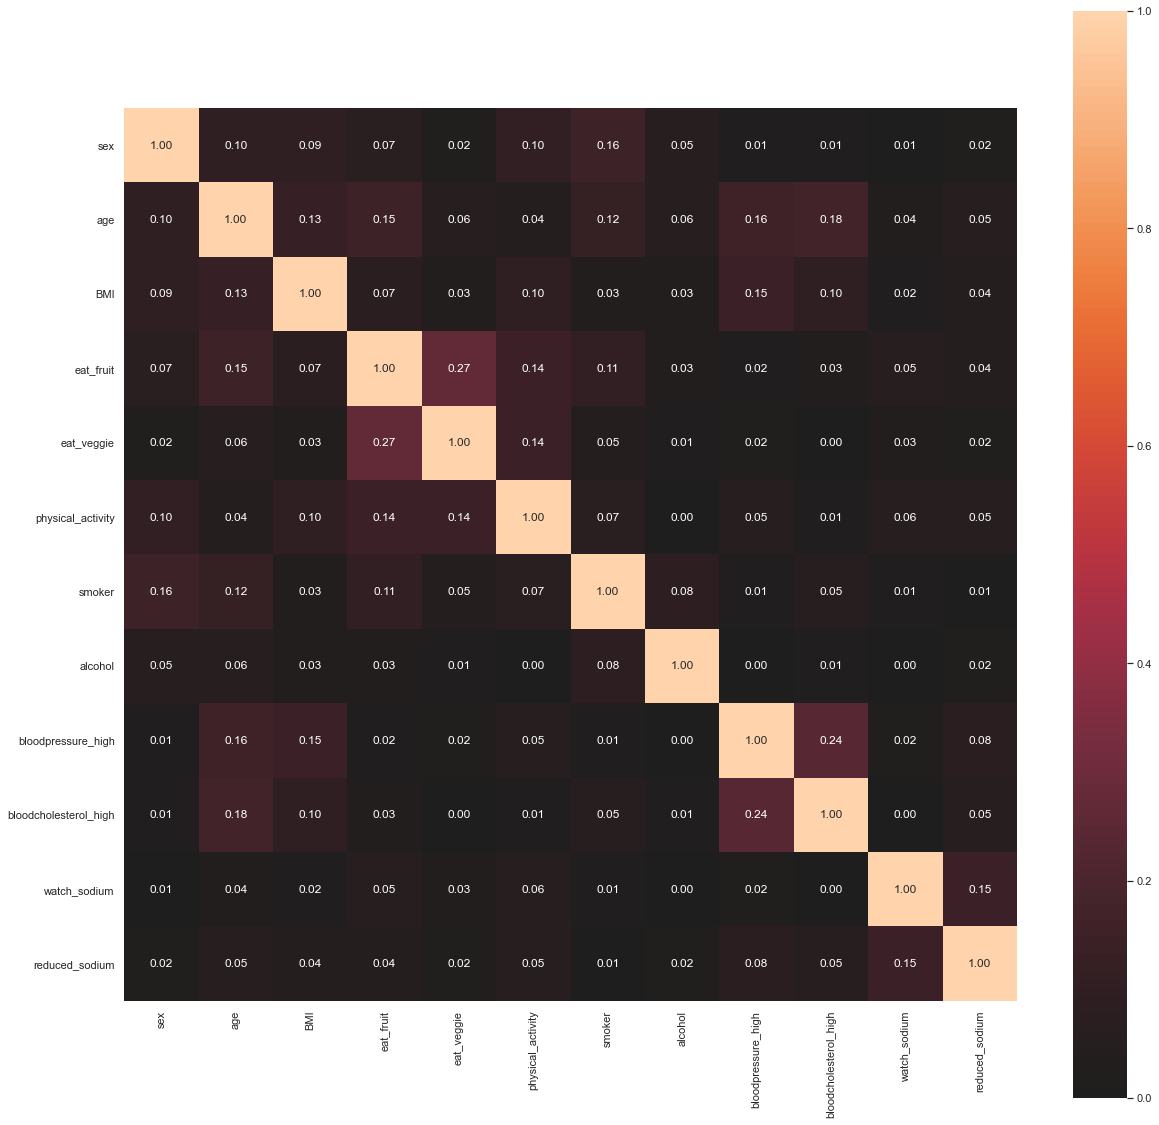

In [40]:
complete_correlation = associations(data_illness, figsize=(20,20))

In [41]:
data_categorical=pd.DataFrame(data[['eat_fruit', 'eat_veggie'
       ,'physical_activity','smoker','alcohol','bloodpressure_high','bloodcholesterol_high'
       ,'heart_diseases' ]])

In [42]:
### What is most commonly experienced by people with health diseases
value = []

for col_name in data_categorical.columns:
    No_of_people = ((data_categorical[col_name] == 'Yes') 
                    & (data_categorical['heart_diseases'] == 'Yes')).sum()
    value.append(No_of_people)
    
No_of_people = pd.DataFrame({
    'group': data_categorical.columns,
    'value': value
})

No_of_people = No_of_people[(No_of_people.group != 'heart_diseases')]
No_of_people = No_of_people.sort_values(['value'], ascending=False).reset_index(drop=True)

In [43]:
No_of_people

,group,value
0,eat_veggie,39153
1,bloodpressure_high,36774
2,physical_activity,32484
3,eat_fruit,32415
4,bloodcholesterol_high,31800
5,smoker,28725
6,alcohol,1640


Text(0.5, 0, 'Symptoms')

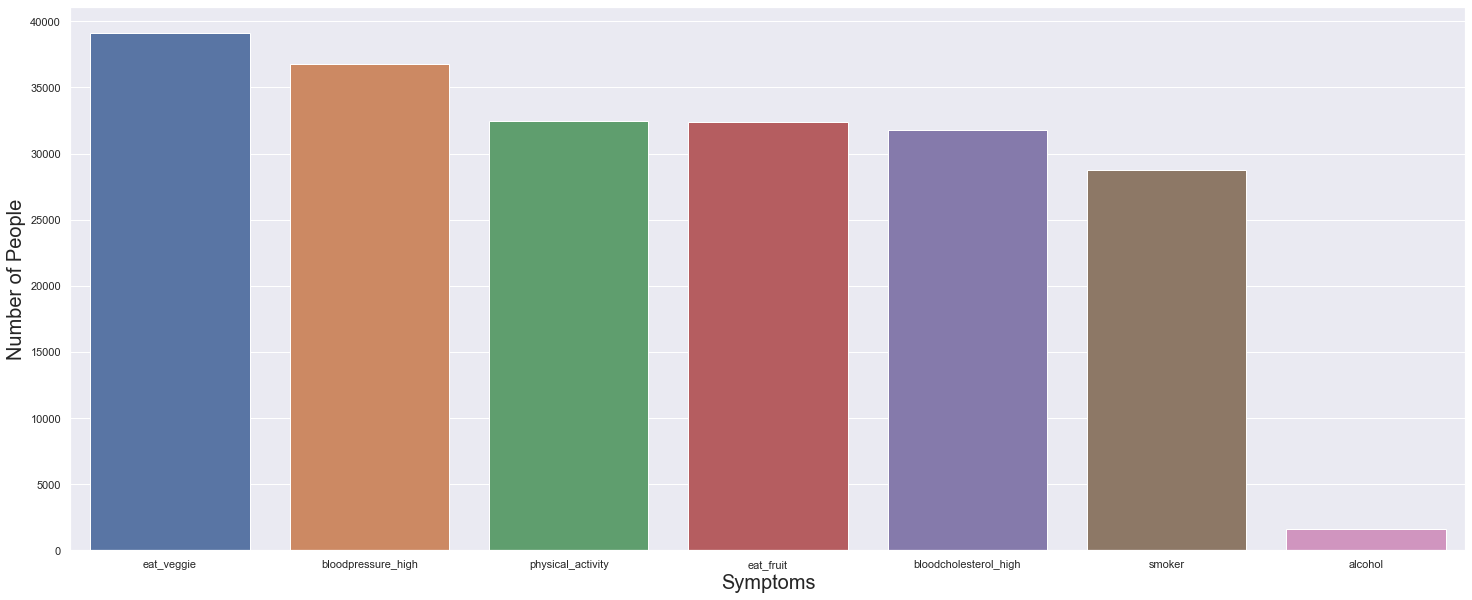

In [44]:
plt.figure(figsize=(25, 10))
p = sb.barplot(
    y = "value", 
    x = "group", 
    data = No_of_people);
p.set_ylabel("Number of People", fontsize = 20)
p.set_xlabel("Symptoms", fontsize = 20)

In [45]:
def remove_high_nan(df,ratio = 0.65):
    for i in df.columns:
        if df[i].isnull().mean() > ratio:
            df.drop(i,axis =1, inplace = True)

Text(0.5, 1.0, 'Null values we Have to handle')

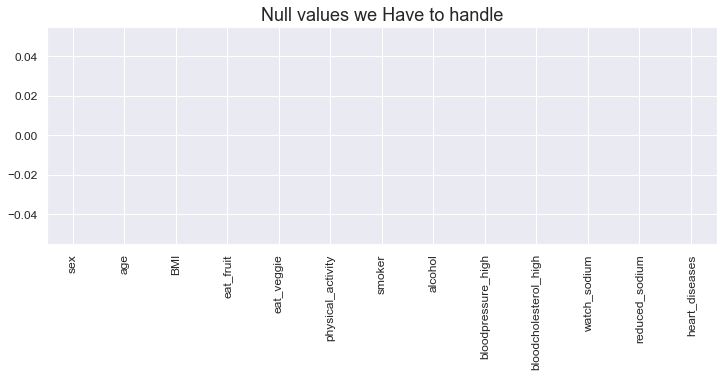

In [46]:
remove_high_nan(data)
data_2 = data.copy()
data.isnull().sum().plot(kind = 'bar', fontsize = 12, figsize = (12,4))
plt.title ('Null values we Have to handle', fontsize = 18)

In [47]:
def add_label(data,attr,name_notnan= 'Training', name_nan= 'Predict'):
    null_pos = data[attr][data[attr].isnull()].index
    data['Label'] = name_notnan
    data['Label'].iloc[null_pos]=name_nan


def mean_median_imputation(data, kind = 'mean'):
    if kind == 'mean':
        return data.fillna(np.mean(data.dropna()))
    elif kind =='median':
        return data.fillna(np.median(data.dropna()))


def mode_imputation(data):
    return data.filllna(stat.mode(data))

In [48]:
from sklearn.ensemble import RandomForestRegressor 

def Miss_forest_impute (data, attrb, dtype):
    train_data, test_data = data[data['Label']=='Training'], data[data['Label']=='Predict']
    
    Y= data[[attrb]]
    X= data.drop(['Label', attrb], axis = 1)
    
    y_train = train_data [[attrb]]
    x_train = train_data.drop (['Label', attrb], axis = 1)
    
    if dtype == 'Continuous':
        model = RandomForestRegressor()
        model.fit(X,Y)
    elif dtype == 'Categorical':
        model = RandomForestClassifier ()
        model.fit (X,Y)
    y_pred = model.predict(x_test)
    
    return y_pred, Y[data['Label']=='Predict'].index

In [49]:
data = pd.get_dummies(data)
not_null_attr = data.isnull().sum()[data.isnull().sum()==0].index
null_attr = data.isnull().sum()[data.isnull() != 0].index
attrbs = {}
njobs = 10

for i in null_atr:
    df = pd.concat((data[not_null_attr], data[i]), axis = 1)
    add_label(df,i)
    
    df[i] = mode_imputation (df[i])
    for job in range(njobs):
        value,index = Miss_forest_impute (df, i, dtype = 'Categorical')
        df[i].iloc[index]= value 
    attrbs[i]=df[i]

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [ ]:
if count : 
    data_2.drop(null_attr, axis = 1, inplace = True)
    count = 0
data_final = pd.concat ((data_2, pd.DataFrame(attrbs)), axis = 1)
data_final.head(10)

In [ ]:
null_attr = data_categorical.isnull().sum()[data_categorical.isnull().sum() != 0].index

f,ax= plt.subplots(1,len(null_attr),figsize = (18,6))
plt.style.use('seaborn')

for pos,i in enumerate(null_attr):
    ax[pos].hist(data[i])
    ax[pos].set_title(i)